# Estimating the value of $\pi$ using a Monte Carlo technique 

The program picks random points in the area $[-1,1] \times [-1,1]$, and determines which fraction of these are within the unit circle. This in turn gives a measure of $\pi$ with associated statistical uncertainty. Performing such "experiments" many times not only gives the value of $\pi$, but also a feel for the use of Monte Carlo, and experience in calculating averages, RMSs, and the error on these.
The first part of the program is mostly for illustration, while the exercise is question 4 on using this in higher dimension problems.

For more information see:
- P. R. Bevington: page 75-78

***

### Authors: 
- Troels C. Petersen (Niels Bohr Institute)

### Date:    
- 06-01-2023 (latest update)

In [190]:
import numpy as np                                     # Matlab like syntax for linear algebra and functions
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Modules to see files and folders in directories
from scipy import stats

and define the parameters of the program:

In [191]:
save_plots = True         # Determining if plots are saved or not
r = np.random
r.seed(42)

# Set parameters:
N_experiments = 1000        # Number of "experiments" determining pi
N_points      = 10000       # Number of points per experiment in determining pi

pi_true = np.pi

## Loop over process:

In [192]:
pi_dist    = np.zeros(N_experiments)
hit_dist_x = np.zeros(N_points)
hit_dist_y = np.zeros(N_points)

for iexp in range(N_experiments):

    # Fill random numbers into square, and see how many are inside unit circle:
    hit_dist_x = r.uniform(-1, 1, N_points)
    hit_dist_y = r.uniform(-1, 1, N_points)
    Nhit = np.sum(hit_dist_x**2 + hit_dist_y**2 < 1)
    
    # Calculate the fraction of points within the circle and its error:
    f  = Nhit / N_points
    sf = np.sqrt(f * (1 - f) / N_points)

    # From this we can get pi and its error, and save it:
    pi_estm  = 4.0 * f
    pi_error = 4.0 * sf
    pi_dist[iexp] = pi_estm

    # Print first couple of pi measurements:
    if (iexp < 5) :
        print(f"{iexp:2d}. pi estimate:   {pi_estm:7.4f} +- {pi_error:6.4f}")

 0. pi estimate:    3.1348 +- 0.0165
 1. pi estimate:    3.1600 +- 0.0163
 2. pi estimate:    3.1320 +- 0.0165
 3. pi estimate:    3.1752 +- 0.0162
 4. pi estimate:    3.1252 +- 0.0165


In [193]:
if (N_experiments > 1):
    pi_mean = pi_dist.mean()
    pi_std = pi_dist.std(ddof=1)
    pi_standard_error = pi_std / np.sqrt(N_experiments)
    print(f"The {N_experiments:d} experiments yield: pi = {pi_mean:7.5f} +- {pi_standard_error:7.5f}     (std = {pi_std:5.3f})")
    print(f"and the agreement with the true value of pi is: {(pi_mean - pi_true) / pi_standard_error:6.2f} sigma")
else :
    print("Since only one experiment was done, no average and RMS can be calculated.")

The 1000 experiments yield: pi = 3.14209 +- 0.00051     (std = 0.016)
and the agreement with the true value of pi is:   0.97 sigma


ShapiroResult(statistic=0.9974719882011414, pvalue=0.12400084733963013)


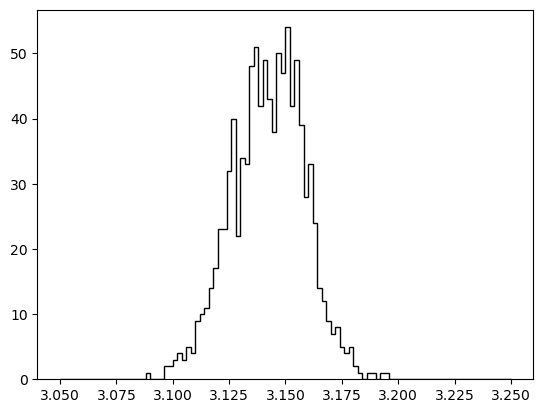

In [194]:
plt.hist(pi_dist, bins=100, range=(3.05, 3.25), histtype='step', color='black')
## is pi_dist gaussian? We use the sepero wilk test
print(stats.shapiro(pi_dist))
#we get a p value of 0.77 which is greater than 0.05 so we can say that the distribution is gaussian

## Plot the histograms:

Distribution of points from one experiment:

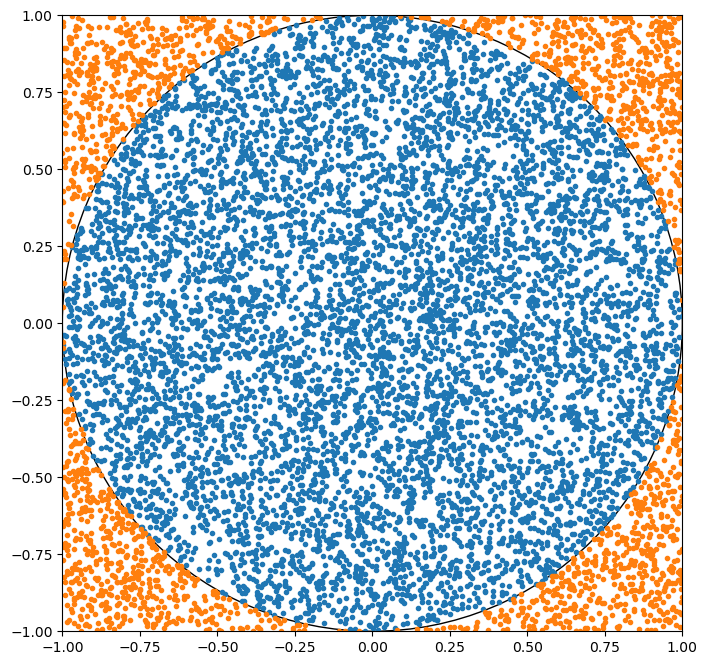

In [195]:
fig1, ax1 = plt.subplots(figsize=(8, 8))    

# Make mask of points inside vs outside the circle:
mask_inside = hit_dist_x**2 + hit_dist_y**2 < 1
mask_outside = ~mask_inside

# Make scatter plot of points:
ax1.plot(hit_dist_x[mask_inside], hit_dist_y[mask_inside], '.')
ax1.plot(hit_dist_x[mask_outside], hit_dist_y[mask_outside], '.')
ax1.set(xlim=(-1, 1), ylim=(-1,1))

# Add circle to plot:
ax1.add_artist(plt.Circle((0, 0), 1, color='k', fill=False))

if save_plots: 
    fig1.savefig("HitDist.pdf")

In [196]:
## now we do the same thing but in higher dimentions.

In [197]:
Dimentions = 10
pi_dist    = np.zeros((N_experiments,Dimentions-1))

for i in range(2,Dimentions+1):
    for iexp in range(N_experiments):
        # Fill random numbers into square, and see how many are inside unit circle:
        hit_dist = r.uniform(-1, 1, size = (N_points,i)).T
        Nhit = np.sum(np.sum(hit_dist**2, axis = 0) < 1)
        
        # Calculate the fraction of points within the circle and its error:
        f  = Nhit / N_points
        sf = np.sqrt(f * (1 - f) / N_points)
        
        # From this we can get pi and its error, and save it:
        pi_estm  = 2**i * f
        pi_error = 2**i * sf
        pi_dist[iexp,i-2] = pi_estm

pi_dist = pi_dist.T
pi_mean = pi_dist.mean(axis = 1)
pi_std = pi_dist.std(axis = 1, ddof=1)
pi_standard_error = pi_std / np.sqrt(N_experiments)
for i in range(len(pi_mean)):
    print(f"in {i+2:d} dimentions the {N_experiments:d} experiments yield: Constant = {pi_mean[i]:7.5f} +- {pi_standard_error[i]:7.5f}     (std = {pi_std[i]:5.3f})")

in 2 dimentions the 1000 experiments yield: Constant = 3.14224 +- 0.00051     (std = 0.016)
in 3 dimentions the 1000 experiments yield: Constant = 4.18816 +- 0.00126     (std = 0.040)
in 4 dimentions the 1000 experiments yield: Constant = 4.93950 +- 0.00225     (std = 0.071)
in 5 dimentions the 1000 experiments yield: Constant = 5.26254 +- 0.00367     (std = 0.116)
in 6 dimentions the 1000 experiments yield: Constant = 5.16079 +- 0.00547     (std = 0.173)
in 7 dimentions the 1000 experiments yield: Constant = 4.72756 +- 0.00748     (std = 0.236)
in 8 dimentions the 1000 experiments yield: Constant = 4.05384 +- 0.01002     (std = 0.317)
in 9 dimentions the 1000 experiments yield: Constant = 3.30199 +- 0.01258     (std = 0.398)
in 10 dimentions the 1000 experiments yield: Constant = 2.54433 +- 0.01668     (std = 0.527)


In [203]:
print(pi_mean[0]/ np.pi - 1)
z = (pi_mean[0]/ np.pi - 1) / pi_standard_error[0]
p = stats.norm.sf(abs(z))*2
print(p)
print('____________________________________________________')
print(pi_mean[1] / np.pi * 3/4 - 1)
z  = (pi_mean[1] / np.pi * 3/4 - 1) / pi_standard_error[1]
p = stats.norm.sf(abs(z))*2
print(p)
print('____________________________________________________')
print(pi_mean[3] / np.pi**2 * 15/8 - 1)
z = (pi_mean[3] / np.pi**2 * 15/8 - 1) / pi_standard_error[3]
p = stats.norm.sf(abs(z))*2
print(p)
print('____________________________________________________')
print(pi_mean[4] / np.pi**3 * 6 - 1)
z = (pi_mean[4] / np.pi**3 * 6 - 1) / pi_standard_error[4]
p = stats.norm.sf(abs(z))*2
print(p)
print('____________________________________________________')
print(pi_mean[5] / np.pi**3 * 105/16 - 1)
z = (pi_mean[5] / np.pi**3 * 105/16 - 1) / pi_standard_error[5]
p = stats.norm.sf(abs(z))*2
print(p)
print('____________________________________________________')
print(pi_mean[6] / np.pi**4 * 24 - 1)
z = (pi_mean[6] / np.pi**4 * 24 - 1) / pi_standard_error[6]
p = stats.norm.sf(abs(z))*2
print(p)
print('____________________________________________________')
print(pi_mean[7] / np.pi**4 * 945/32 - 1)
z = (pi_mean[7] / np.pi**4 * 945/32 - 1) / pi_standard_error[7]
p = stats.norm.sf(abs(z))*2
print(p)
print('____________________________________________________')
print(pi_mean[8] / np.pi**5 * 120 - 1)
z = (pi_mean[8] / np.pi**5 * 120 - 1) / pi_standard_error[8]
p = stats.norm.sf(abs(z))*2
print(p)
print('____________________________________________________')

0.00020516549447413546
0.6858745785573954
____________________________________________________
-0.0001493043947807804
0.9055101144379356
____________________________________________________
-0.00023774013567412489
0.948281722442595
____________________________________________________
-0.0013389250417845666
0.8064592114391445
____________________________________________________
0.0005923742437548007
0.9368563775614981
____________________________________________________
-0.0012012003475277977
0.9046247230409992
____________________________________________________
0.0010554760844805333
0.9331208206901128
____________________________________________________
-0.002286613639816415
0.8909553051363711
____________________________________________________


The constants are:

2D = $\pi$

3D = $\frac{4}{3}\pi$

4D = $2\pi^2$

5D = $\frac{8}{15}\pi^2$

6D = $\frac{1}{6}\pi^3$

7D = $\frac{16}{105}\pi^3$

8D = $\frac{1}{24}\pi^4$

9D = $\frac{32}{945}\pi^4$

10D = $\frac{1}{120}\pi^5$ 

***

First acquaint yourself with the program, and make sure that you understand what the parameters `N_experiment` and `N_points` refer to! Also, before running the program,
calculate what precision you expect on pi in each experiment, when using the number of points chosen in the program (i.e. 2000 points).

Then, run the program, and then take a look at the result... which requires that you fill in the calculations yourself!

# Initial simple questions:

0. Plot the distribution of $\pi$ values obtained.

1. Try to run 100 experiments with 2000 points in each. What is the expected approximate uncertainty on $\pi$ in each experiment? Does the result agree with what you calculated before running the program? What is the uncertainty on the AVERAGE of all 100 experiments? 

2. How do you expect the values of $\pi$ to distribute themselves? And is this the case here?

3. Does it make any difference on the precision of the final $\pi$ value, whether you make many experiments with few points, or one experiment with many points, as long as the product of `N_experiment` $\times$ `N_points` remains constant?

# The real exercise question:

4. Now try to use this method in three dimensions to estimate the constant in front of the $r^3$ expression for the volume. Do you get $\frac{4}{3} \pi$?
    Increase the dimensionality (say up to 10), and see if you can figure out the constants needed to calculate the hyper-volumes!

    HINT: I'll reveal that for `N_dim` of 4 and 5, the constant contains $\pi^2$ and some simple rational fraction, while for `N_dim` 6 and 7, it contains $\pi^3$ and a
      rational fraction.

# Learning points:

This is an exercise in using simulation for numerical estimates, that are otherwise rather complicated. Especially in high dimensionality, it can be hard to produce good solutions, while simulation (such as this exercise) gives an easier alternative.

From the exercise you should:
1. Get experience with a simulation solution example.
2. Train estimation of uncertainties on multiple estimates (here of pi).
3. Exercise hypothesis testing, comparing simulated estimates to multiple hypothesis (rational fractions). 

Following this exercise, you should feel comfortable in working out a simulated answer to a problem/case.